# MapleTech Post Covid Data Anlaysis

1.   Introduction
2.   Data Loading
3.   Data Cleaning
4.   Sales & Revenue Trends
5.	Customer Segmentation & Loyalty
6.	Channel & Regional Insights
7.	Product Category Performance
8.	Conclusion



# Introduction

*   **Purpose:** This project aims to analyze MapleTech’s global e-commerce performance in the post-pandemic era, identifying patterns in sales, customer behavior, refund trends, and channel performance. Through data-driven insights, this project will help uncover how MapleTech can optimize its product offerings, improve customer retention, and fine-tune its marketing strategy for long-term global growth.




*   **Dataset Overview:**

1. raw_orders.csv: Core dataset containing purchase history, pricing
(local & USD), customer IDs, product info, sales platform, and full order status timeline (purchase, ship, delivery, refund).

2. geo_lookup.csv: Mapping of countries to broader regions for geo-based analysis and trend comparison.

Together, these datasets enable a full analytics workflow from raw transactions to strategic recommendations.

## Data Loading


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import process, fuzz

In [ ]:
# Reading the orders dataset
df = pd.read_csv('/content/raw_orders.csv')

In [ ]:
# Date columns to convert to avoid errors
date_columns = ['PURCHASE_TS', 'SHIP_TS', 'DELIVERY_TS', 'REFUND_TS', 'CREATED_ON']

# Datetime conversion
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Reading the geo dataset
geo = pd.read_csv('/content/geo.csv')

In [ ]:
df

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,DELIVERY_TS,REFUND_TS,product_name,PRODUCT_ID,USD_PRICE,LOCAL_PRICE,CURRENCY,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,LOYALTY_PROGRAM,CREATED_ON
0,93705,121106,2019-01-01 01:40:00,2019-01-02 01:40:00,2019-01-06 01:40:00,NaT,LG UltraFine 5K Moni43tor,3226,83.33,281.29,CAD,website,direct,NaN,CA,1,2018-06-06 01:40:00
1,74613,139607,2019-01-01 01:42:00,2019-01-02 01:42:00,2019-01-09 01:42:00,NaT,Anker USB-C Charger,4060,1208.13,1111.48,EUR,website,email,Facebook,DE,1,2018-11-26 01:42:00
2,49156,114883,2019-01-01 02:02:00,2019-01-03 02:02:00,2019-01-06 02:02:00,NaT,Sony@ WH5-1000XM5 Headphhones,3146,28.43,38.38,CAD,website,direct,Facebook,CA,0,2018-08-12 02:02:00
3,53800,116523,2019-01-01 02:03:00,2019-01-03 02:03:00,2019-01-05 02:03:00,NaT,Dell@ XP4S 13 L@pto4p,4202,168.95,155.43,EUR,website,direct,Facebook,FR,0,2018-03-17 02:03:00
4,63853,155253,2019-01-01 02:22:00,2019-01-04 02:22:00,2019-01-06 02:22:00,NaT,Anker USB-C Charger,2721,1167.51,6304.53,BRL,website,email,Email,BR,1,2018-06-22 02:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112925,96325,193030,NaT,2020-12-28 17:33:00,2021-01-07 17:33:00,NaT,Macbook Air Laptop,1042,348.06,28889.01,INR,website,direct,Google,IN,0,2020-04-26 17:33:00
112926,88061,197277,NaT,2020-06-29 12:11:00,2020-07-06 12:11:00,NaT,JBL Live Pro+ Earbuds,3040,1051.24,18922.30,MXN,website,direct,Facebook,MX,1,2020-02-29 12:11:00
112927,43495,202439,NaT,2022-08-28 19:40:00,2022-09-01 19:40:00,NaT,App4le iPhon34e,8838,208.72,208.72,USD,website,direct,Google,US,0,2021-11-27 19:40:00
112928,24322,202461,NaT,2021-09-19 03:11:00,2021-09-29 03:11:00,NaT,Macbook Air Laptop,7272,377.89,31365.21,INR,website,direct,NaN,IN,0,2021-01-13 03:11:00


In [ ]:
df['PURCHASE_TS'] = pd.to_datetime(df['PURCHASE_TS'])
# df['purchase_ts']= df['purchase_ts'].dt.date

df['SHIP_TS'] = pd.to_datetime(df['SHIP_TS'])
# df['ship_ts']= df['ship_ts'].dt.date

df['DELIVERY_TS'] = pd.to_datetime(df['DELIVERY_TS'])
# df['delivery_ts']= df['delivery_ts'].dt.date

df['REFUND_TS'] = pd.to_datetime(df['REFUND_TS'])
# df['refund_ts']= df['refund_ts'].dt.date

df['CREATED_ON'] = pd.to_datetime(df['CREATED_ON'])
# df['created_on']= df['created_on'].dt.date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112930 entries, 0 to 112929
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   USER_ID                  112930 non-null  int64         
 1   ORDER_ID                 112930 non-null  int64         
 2   PURCHASE_TS              112899 non-null  datetime64[ns]
 3   SHIP_TS                  112930 non-null  datetime64[ns]
 4   DELIVERY_TS              112930 non-null  datetime64[ns]
 5   REFUND_TS                10895 non-null   datetime64[ns]
 6   product_name             112930 non-null  object        
 7   PRODUCT_ID               112930 non-null  int64         
 8   USD_PRICE                112891 non-null  float64       
 9   LOCAL_PRICE              112896 non-null  float64       
 10  CURRENCY                 112930 non-null  object        
 11  PURCHASE_PLATFORM        112930 non-null  object        
 12  MARKETING_CHANNE

In [ ]:
df= df.rename(columns = {
    'USER_ID': 'user_id',
    'ORDER_ID': 'order_id',
    'PURCHASE_TS': 'purchase_ts',
    'SHIP_TS': 'ship_ts',
    'DELIVERY_TS': 'delivery_ts',
    'REFUND_TS': 'refund_ts',
    'PRODUCT_NAME': 'product_name',
    'PRODUCT_ID': 'product_id',
    'LOCAL_PRICE': 'local_price',
    'USD_PRICE': 'usd_price',
    'CURRENCY': 'currency',
    'PURCHASE_PLATFORM': 'purchase_platform',
    'MARKETING_CHANNEL': 'marketing_channel',
    'ACCOUNT_CREATION_METHOD': 'account_creation_method',
    'COUNTRY_CODE': 'country_code',
    'LOYALTY_PROGRAM':'loyalty_program',
    'CREATED_ON': 'created_on'
})

In [ ]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  9 non-null      object
 1   region        9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes


In [ ]:
geo

,country_code,region
0,US,North America
1,CA,North America
2,FR,Europe
3,DE,Europe
4,IN,Asia
5,BR,South America
6,JP,Asia
7,MX,North America
8,UK,Europe


# Data Cleaning

Data cleaning is a crucial step before analysis to help prepare the dataset for analysis. This section will focus on handling missing values, duplicates and normalizing the whole dataset

## Normalizing and Inspecting the dataset

In [ ]:
# Normalizing column names to lowercase
df.columns = df.columns.str.lower()

df.columns

Index(['user_id', 'order_id', 'purchase_ts', 'ship_ts', 'delivery_ts',
       'refund_ts', 'product_name', 'product_id', 'usd_price', 'local_price',
       'currency', 'purchase_platform', 'marketing_channel',
       'account_creation_method', 'country_code', 'loyalty_program',
       'created_on'],
      dtype='object')

In [ ]:
# Normalizing column names to lowercase
geo.columns = geo.columns.str.lower()

geo.columns

Index(['country_code', 'region'], dtype='object')

## Dealing with missing values

In [ ]:
geo['country_code'].unique()

array(['US', 'CA', 'FR', 'DE', 'IN', 'BR', 'JP', 'MX', 'UK'], dtype=object)

The region column is uncleaned with improper region names, special characters, etc .

Remove Duplicates: Check for duplicate entries in country_code and remove any if found.

In [ ]:
# check if duplicates exist
geo['country_code'].duplicated().sum()

np.int64(0)

## Data Type Corrections

Verfify min and max dates for each date column (eg. purchase_ts	ship_ts	delivery_ts	refund_ts	created_on)

In [ ]:
df[['purchase_ts', 'ship_ts', 'delivery_ts', 'refund_ts', 'created_on']].agg(['min', 'max'])

,purchase_ts,ship_ts,delivery_ts,refund_ts,created_on
min,2019-01-01 01:40:00,2019-01-02 01:40:00,2019-01-04 14:28:00,2019-01-11 18:29:00,2018-01-07 12:03:00
max,2022-12-29 06:54:00,2022-12-31 23:47:00,2023-01-07 23:13:00,2023-01-14 23:51:00,2022-11-28 08:55:00


Verifying if product names need cleaning or they are standardized

In [ ]:
df['product_name'].unique()

array(['LG UltraFine 5K Moni43tor', 'Anker USB-C Charger',
       'Sony@ WH5-1000XM5 Headphhones', 'Dell@ XP4S 13 L@pto4p',
       'Dell XPS 13 Laptop', 'Ma4cboook Air Lapto3p',
       'ASUS ProArt Display', 'Sony WH-1000XM5 Headphones',
       'Anke4r USB-C Ch@rger', 'JBL Live Pro+- E@rbuds',
       'Macbook Air Laptop', 'JBL Live Pro+ Earbuds',
       'ASssUS ProArt Display', 'App4le iPhon34e', 'Apple iPhone',
       'LG UltraFine 5K Monitor'], dtype=object)

In [ ]:

product_names = ['LG UltraFine 5K Moni43tor', 'Anker USB-C Charger',
       'Sony@ WH5-1000XM5 Headphhones', 'Dell@ XP4S 13 L@pto4p',
       'Dell XPS 13 Laptop', 'Ma4cboook Air Lapto3p',
       'ASUS ProArt Display', 'Sony WH-1000XM5 Headphones',
       'Anke4r USB-C Ch@rger', 'JBL Live Pro+- E@rbuds',
       'Macbook Air Laptop', 'JBL Live Pro+ Earbuds',
       'ASssUS ProArt Display', 'App4le iPhon34e', 'Apple iPhone',
       'LG UltraFine 5K Monitor']


clean_names = {'LG UltraFine 5K Moni43tor' : 'LG UltraFine 5K Monitor',
               'Anke4r USB-C Ch@rger': 'Anker USB-C Charger',
               'Sony@ WH5-1000XM5 Headphhones' : 'Sony WH-1000XM5 Headphones',
               'Dell@ XP4S 13 L@pto4p' : 'Dell XPS 13 Laptop',
               'Ma4cboook Air Lapto3p' : 'Macbook Air Laptop',
               'ASssUS ProArt Display' : 'ASUS ProArt Display',
               'JBL Live Pro+- E@rbuds' : 'JBL Live Pro+ Earbuds',
               'App4le iPhon34e' : 'Apple iPhone'}

# Apply the mapping
df['product_name'] = df['product_name'].apply(lambda name: clean_names.get(name,name))

df['product_name'].unique()

array(['LG UltraFine 5K Monitor', 'Anker USB-C Charger',
       'Sony WH-1000XM5 Headphones', 'Dell XPS 13 Laptop',
       'Macbook Air Laptop', 'ASUS ProArt Display',
       'JBL Live Pro+ Earbuds', 'Apple iPhone'], dtype=object)

## Final Data cleaning check


Other columns like ( PURCHASE_PLATFORM, MARKETING_CHANNEL	ACCOUNT_CREATION_METHOD,	COUNTRY_CODE, etc.) seem to be clean and complete. We will not be doing any further cleaning on these columns.


Instead we will check the percentage of null values in our entire dataset to get a jist of how much is missing data we have and make a decision to fill them or leave them as it is.

In [ ]:

columns = ['currency', 'country_code', 'purchase_ts', 'usd_price', 'marketing_channel', 'account_creation_method']

# Calculate the null value percent
for col in columns:
    percent_null = df[col].isnull().mean() * 100
    print(f'{col}: {percent_null:.2f}%')

currency: 0.00%
country_code: 0.00%
purchase_ts: 0.03%
usd_price: 0.03%
marketing_channel: 1.03%
account_creation_method: 25.12%


None of the columns with NULL values have a high percentage of missing values, but it’s important to note the impact of the percentage of missing data in each column of our dataset.

In [ ]:
# Adding a column is_refunded to the df to make it easier to filter
df['is_refunded'] = df['refund_ts'].notnull()
df['is_refunded'].value_counts()

,count
is_refunded,
False,102035
True,10895


# Merging datasets

Now we will combine two datasets we have ( df and geo) to get the dataset ready for analysis

In [ ]:
df = df.merge(geo, on = 'country_code', how = 'left')
df.head(15)

,user_id,order_id,purchase_ts,ship_ts,delivery_ts,refund_ts,product_name,product_id,usd_price,local_price,currency,purchase_platform,marketing_channel,account_creation_method,country_code,loyalty_program,created_on,is_refunded,region
0,93705,121106,2019-01-01 01:40:00,2019-01-02 01:40:00,2019-01-06 01:40:00,NaT,LG UltraFine 5K Monitor,3226,83.3300,281.29,CAD,website,direct,NaN,CA,1,2018-06-06 01:40:00,False,North America
1,74613,139607,2019-01-01 01:42:00,2019-01-02 01:42:00,2019-01-09 01:42:00,NaT,Anker USB-C Charger,4060,1208.1300,1111.48,EUR,website,email,Facebook,DE,1,2018-11-26 01:42:00,False,Europe
2,49156,114883,2019-01-01 02:02:00,2019-01-03 02:02:00,2019-01-06 02:02:00,NaT,Sony WH-1000XM5 Headphones,3146,28.4300,38.38,CAD,website,direct,Facebook,CA,0,2018-08-12 02:02:00,False,North America
3,53800,116523,2019-01-01 02:03:00,2019-01-03 02:03:00,2019-01-05 02:03:00,NaT,Dell XPS 13 Laptop,4202,168.9500,155.43,EUR,website,direct,Facebook,FR,0,2018-03-17 02:03:00,False,Europe
4,63853,155253,2019-01-01 02:22:00,2019-01-04 02:22:00,2019-01-06 02:22:00,NaT,Anker USB-C Charger,2721,1167.5100,6304.53,BRL,website,email,Email,BR,1,2018-06-22 02:22:00,False,South America
5,89763,148794,2019-01-01 03:01:00,2019-01-02 03:01:00,2019-01-09 03:01:00,NaT,Sony WH-1000XM5 Headphones,5015,29.2200,26.88,EUR,website,direct,Facebook,FR,1,2018-02-15 03:01:00,False,Europe
6,59149,194993,2019-01-01 03:17:00,2019-01-04 03:17:00,2019-01-10 03:17:00,NaT,Dell XPS 13 Laptop,2599,148.1700,23706.87,JPY,mobile app,direct,Google,JP,1,2018-10-06 03:17:00,False,Asia
7,98777,192723,2019-01-01 04:00:00,2019-01-04 04:00:00,2019-01-06 04:00:00,NaT,Dell XPS 13 Laptop,5325,170.3600,919.92,BRL,website,email,Email,BR,0,2018-04-07 04:00:00,False,South America
8,26579,184948,2019-01-01 04:18:00,2019-01-04 04:18:00,2019-01-11 04:18:00,NaT,Dell XPS 13 Laptop,2928,159.4000,860.74,BRL,website,direct,NaN,BR,0,2018-05-03 04:18:00,False,South America
9,40969,102138,2019-01-01 04:22:00,2019-01-04 04:22:00,2019-01-07 04:22:00,NaT,Dell XPS 13 Laptop,8177,165.6200,152.37,EUR,website,direct,Facebook,DE,0,2018-01-17 04:22:00,False,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112930 entries, 0 to 112929
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  112930 non-null  int64         
 1   order_id                 112930 non-null  int64         
 2   purchase_ts              112899 non-null  datetime64[ns]
 3   ship_ts                  112930 non-null  datetime64[ns]
 4   delivery_ts              112930 non-null  datetime64[ns]
 5   refund_ts                10895 non-null   datetime64[ns]
 6   product_name             112930 non-null  object        
 7   product_id               112930 non-null  int64         
 8   usd_price                112891 non-null  float64       
 9   local_price              112896 non-null  float64       
 10  currency                 112930 non-null  object        
 11  purchase_platform        112930 non-null  object        
 12  marketing_channe

In [ ]:
df.describe()

,user_id,order_id,purchase_ts,ship_ts,delivery_ts,refund_ts,product_id,usd_price,local_price,loyalty_program,created_on
count,112930.000000,1.129300e+05,112899,112930,112930,10895,112930.000000,112891.000000,112896.000000,112930.000000,112930
mean,55056.907527,1.965874e+05,2021-02-14 06:42:39.414874880,2021-02-18 21:06:43.638536960,2021-02-24 09:40:52.511290112,2021-02-18 16:56:54.145938688,5498.254662,548.353530,13680.983523,0.444762,2020-07-31 12:14:15.607013120
min,10000.000000,1.000000e+05,2019-01-01 01:40:00,2019-01-02 01:40:00,2019-01-04 14:28:00,2019-01-11 18:29:00,1000.000000,28.003500,19.133300,0.000000,2018-01-07 12:03:00
25%,32533.000000,1.282322e+05,2020-04-20 03:55:30,2020-04-26 14:44:30,2020-05-02 12:55:00,2020-06-18 16:08:00,3241.000000,174.867000,256.430000,0.000000,2019-10-01 17:14:45
50%,55066.000000,1.564645e+05,2021-01-09 06:53:00,2021-01-15 11:09:00,2021-01-21 14:18:30,2021-01-08 15:44:00,5501.000000,373.549000,881.070000,0.000000,2020-07-24 08:12:00
75%,77533.750000,1.846968e+05,2021-12-13 09:04:30,2021-12-19 14:22:30,2021-12-25 14:05:00,2021-11-16 15:35:00,7746.000000,1026.443500,5926.177500,1.000000,2021-06-15 08:03:00
max,99999.000000,1.208087e+06,2022-12-29 06:54:00,2022-12-31 23:47:00,2023-01-07 23:13:00,2023-01-14 23:51:00,9999.000000,1573.975856,202200.210000,1.000000,2022-11-28 08:55:00
std,25996.974655,2.041667e+05,NaN,NaN,NaN,NaN,2598.376795,454.715234,33918.980352,0.496942,NaN


# Exploratory Data Analysis (EDA)

Our objective is to analyze and visualize basic trends in the data to uncover any underlying patterns in sales, orders and customer behavior across different countries

## Montly, Quaterly and Yearly Sales

Monthly Sales

Analyze key monthly metrics, including total sales, average order value (AOV), and order growth rates. Understanding these monthly trends provides insights into seasonality, promotional impact, and business health over time.

In [ ]:
# Monthly Aggregation
df['purchase_month'] = df['purchase_ts'].dt.to_period('M')

# Group and summarize key monthly metrics
monthly_summary = df.groupby('purchase_month').agg(
    monthly_revenue_usd=('usd_price', 'sum'),
    avg_order_value_usd=('usd_price', 'mean'),
    num_orders=('order_id', 'nunique')
).reset_index()

# Computing growth  rate
monthly_summary['revenue_growth_%'] = monthly_summary['monthly_revenue_usd'].pct_change() * 100
monthly_summary['aov_growth_%'] = monthly_summary['avg_order_value_usd'].pct_change() * 100
monthly_summary['order_growth_%'] = monthly_summary['num_orders'].pct_change() * 100

# Cleaning and filling the NA values
monthly_summary = monthly_summary.fillna(0)
monthly_summary[['monthly_revenue_usd', 'avg_order_value_usd']] = monthly_summary[
    ['monthly_revenue_usd', 'avg_order_value_usd']
].round(2)
monthly_summary[['num_orders']] = monthly_summary[['num_orders']].astype(int)
monthly_summary[['revenue_growth_%', 'aov_growth_%', 'order_growth_%']] = monthly_summary[
    ['revenue_growth_%', 'aov_growth_%', 'order_growth_%']
].round(1)

# Apply background gradient for customization
styled_summary = monthly_summary.style.format({
    'monthly_revenue_usd': '${:,.0f}',
    'avg_order_value_usd': '${:,.2f}',
    'revenue_growth_%': '{:+.1f}%',
    'aov_growth_%': '{:+.1f}%',
    'order_growth_%': '{:+.1f}%'
}).background_gradient(
    subset=['revenue_growth_%', 'aov_growth_%', 'order_growth_%'],
    cmap='coolwarm',
    vmin=-100, vmax=100
)

styled_summary

,purchase_month,monthly_revenue_usd,avg_order_value_usd,num_orders,revenue_growth_%,aov_growth_%,order_growth_%
0,2019-01,"$646,217",$484.78,1334,+0.0%,+0.0%,+0.0%
1,2019-02,"$545,727",$484.66,1127,-15.6%,-0.0%,-15.5%
2,2019-03,"$685,587",$486.92,1410,+25.6%,+0.5%,+25.1%
3,2019-04,"$783,489",$499.04,1570,+14.3%,+2.5%,+11.3%
4,2019-05,"$781,226",$485.53,1609,-0.3%,-2.7%,+2.5%
5,2019-06,"$816,886",$509.28,1607,+4.6%,+4.9%,-0.1%
6,2019-07,"$774,080",$505.27,1532,-5.2%,-0.8%,-4.7%
7,2019-08,"$655,315",$484.70,1352,-15.3%,-4.1%,-11.7%
8,2019-09,"$638,605",$485.26,1317,-2.5%,+0.1%,-2.6%
9,2019-10,"$633,562",$475.65,1332,-0.8%,-2.0%,+1.1%


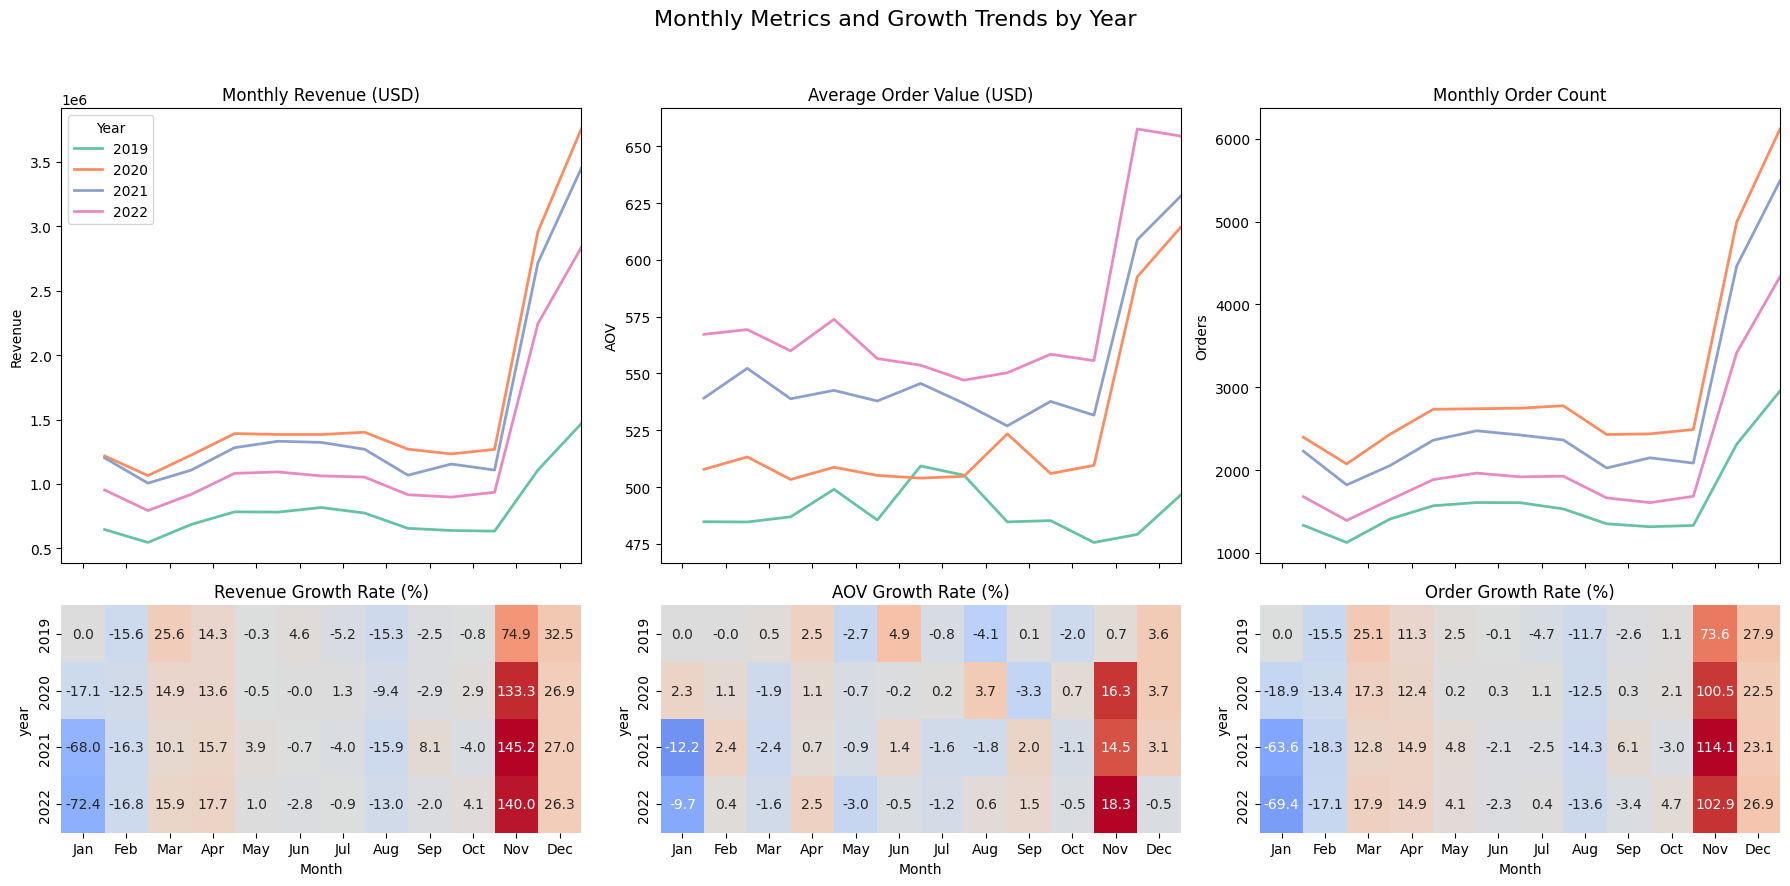

In [ ]:
# Extracting year and month as columns
monthly_summary['year'] = monthly_summary['purchase_month'].dt.year
monthly_summary['month'] = monthly_summary['purchase_month'].dt.month

# Steup for line plots and heatmap
fig, axes = plt.subplots(2, 3, figsize=(18, 9), sharex='col', gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0.4)

# Unique colors for each year
years = sorted(monthly_summary['year'].unique())
palette = sns.color_palette("Set2", len(years))

# Line charts to plot for each metric
metrics = ['monthly_revenue_usd', 'avg_order_value_usd', 'num_orders']
titles = ['Monthly Revenue (USD)', 'Average Order Value (USD)', 'Monthly Order Count']
y_labels = ['Revenue', 'AOV', 'Orders']

# Heatmaps to plot for growth metrics
growth_metrics = ['revenue_growth_%', 'aov_growth_%', 'order_growth_%']
growth_titles = ['Revenue Growth Rate (%)', 'AOV Growth Rate (%)', 'Order Growth Rate (%)']

# Line plots
for i, (metric, title, ylabel) in enumerate(zip(metrics, titles, y_labels)):
    ax = axes[0, i]
    for j, year in enumerate(years):
        data = monthly_summary[monthly_summary['year'] == year]
        ax.plot(data['month'], data[metric], label=str(year), color=palette[j], linewidth=2)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if i == 0:
        ax.legend(title='Year', loc='upper left')

# Heatmaps
for i, (growth_metric, title) in enumerate(zip(growth_metrics, growth_titles)):
    pivot_data = monthly_summary.pivot(index='year', columns='month', values=growth_metric)
    sns.heatmap(pivot_data, ax=axes[1, i], cmap='coolwarm', center=0, annot=True, fmt=".1f", cbar=False)
    axes[1, i].set_title(title)
    axes[1, i].set_xlabel("Month")
    axes[1, i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Title for plots
plt.suptitle("Monthly Metrics and Growth Trends by Year", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Quarterly Summary

Just like monthly metrics we analyze quaterly metrics . Understanding these monthly and quaterly metrics helps us understand insights into trends, seasonality and business growth overtime

In [ ]:
# Extracting purchase quarter
df['purchase_quarter'] = df['purchase_ts'].dt.to_period('Q')

# Grouping and summarizing key quaterly metrics
quarterly_summary = df.groupby('purchase_quarter').agg(
    quarterly_revenue_usd=('usd_price', 'sum'),
    average_order_value_usd=('usd_price', 'mean'),
    total_orders=('order_id', 'nunique')
).reset_index()

# Calculating quatelry growth rates
quarterly_summary['revenue_growth_%'] = quarterly_summary['quarterly_revenue_usd'].pct_change() * 100
quarterly_summary['aov_growth_%'] = quarterly_summary['average_order_value_usd'].pct_change() * 100
quarterly_summary['order_growth_%'] = quarterly_summary['total_orders'].pct_change() * 100

# Cleaning and Filling the NA values
quarterly_summary = quarterly_summary.fillna(0)
quarterly_summary[['quarterly_revenue_usd', 'average_order_value_usd']] = quarterly_summary[
    ['quarterly_revenue_usd', 'average_order_value_usd']
].round(2)
quarterly_summary[['total_orders']] = quarterly_summary[['total_orders']].astype(int)
quarterly_summary[['revenue_growth_%', 'aov_growth_%', 'order_growth_%']] = quarterly_summary[
    ['revenue_growth_%', 'aov_growth_%', 'order_growth_%']
].round(1)

# Background gradient for customization
styled_quarterly_summary = quarterly_summary.style.format({
    'quarterly_revenue_usd': '${:,.0f}',
    'average_order_value_usd': '${:,.2f}',
    'revenue_growth_%': '{:+.1f}%',
    'aov_growth_%': '{:+.1f}%',
    'order_growth_%': '{:+.1f}%'
}).background_gradient(
    subset=['revenue_growth_%', 'aov_growth_%', 'order_growth_%'],
    cmap='Spectral',
    vmin=-100,
    vmax=100
)

# Displaying the output
styled_quarterly_summary

,purchase_quarter,quarterly_revenue_usd,average_order_value_usd,total_orders,revenue_growth_%,aov_growth_%,order_growth_%
0,2019Q1,"$1,877,531",$485.53,3871,+0.0%,+0.0%,+0.0%
1,2019Q2,"$2,381,600",$497.93,4786,+26.8%,+2.6%,+23.6%
2,2019Q3,"$2,068,001",$492.38,4201,-13.2%,-1.1%,-12.2%
3,2019Q4,"$3,209,079",$486.22,6600,+55.2%,-1.3%,+57.1%
4,2020Q1,"$3,506,519",$507.90,6905,+9.3%,+4.5%,+4.6%
5,2020Q2,"$4,158,844",$505.94,8224,+18.6%,-0.4%,+19.1%
6,2020Q3,"$3,904,086",$511.07,7645,-6.1%,+1.0%,-7.0%
7,2020Q4,"$7,982,129",$587.14,13601,+104.5%,+14.9%,+77.9%
8,2021Q1,"$3,315,450",$542.98,6106,-58.5%,-7.5%,-55.1%
9,2021Q2,"$3,935,421",$541.99,7261,+18.7%,-0.2%,+18.9%


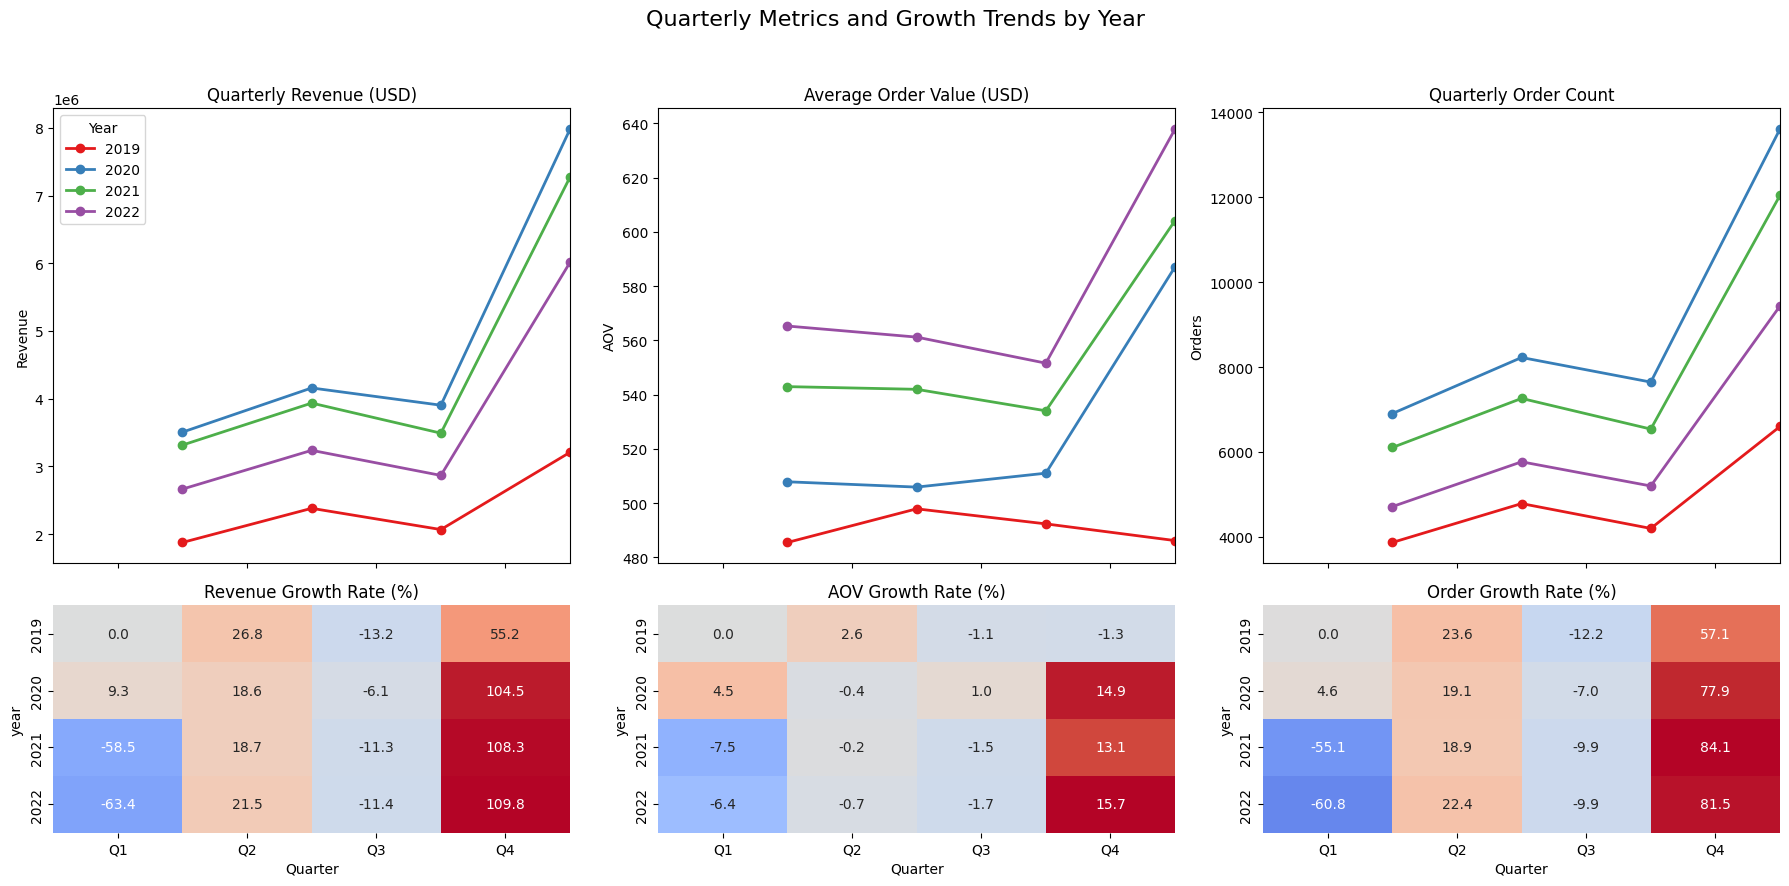

In [ ]:

# Splitting quarter into year and quarter number
quarterly_summary['year'] = quarterly_summary['purchase_quarter'].dt.year
quarterly_summary['quarter'] = quarterly_summary['purchase_quarter'].dt.quarter

# Setup for plots
fig, axes = plt.subplots(2, 3, figsize=(18, 9), sharex='col', gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0.4)

# Quaterly Metrics
metrics = ['quarterly_revenue_usd', 'average_order_value_usd', 'total_orders']
titles = ['Quarterly Revenue (USD)', 'Average Order Value (USD)', 'Quarterly Order Count']
y_labels = ['Revenue', 'AOV', 'Orders']

# Growth metrics
growth_metrics = ['revenue_growth_%', 'aov_growth_%', 'order_growth_%']
growth_titles = ['Revenue Growth Rate (%)', 'AOV Growth Rate (%)', 'Order Growth Rate (%)']

# Plot line charts for quaterly metrics
years = sorted(quarterly_summary['year'].unique())
palette = sns.color_palette("Set1", len(years))

for i, (metric, title, ylabel) in enumerate(zip(metrics, titles, y_labels)):
    ax = axes[0, i]
    for j, year in enumerate(years):
        data = quarterly_summary[quarterly_summary['year'] == year]
        ax.plot(data['quarter'], data[metric], marker='o', label=str(year), color=palette[j], linewidth=2)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
    if i == 0:
        ax.legend(title='Year', loc='upper left')

# Heatmaps of growth rate
for i, (growth_metric, title) in enumerate(zip(growth_metrics, growth_titles)):
    pivot_data = quarterly_summary.pivot(index='year', columns='quarter', values=growth_metric)
    sns.heatmap(pivot_data, ax=axes[1, i], cmap='coolwarm', center=0, annot=True, fmt=".1f", cbar=False)
    axes[1, i].set_title(title)
    axes[1, i].set_xlabel("Quarter")
    axes[1, i].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

plt.suptitle("Quarterly Metrics and Growth Trends by Year", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Yearly Summary

Just like we did for monthly and quaterly metrics we will do the similar for yearly summary. It will help us understand if over the years there was any impact from covid

In [ ]:
# Extracting purchase year
df['purchase_year'] = df['purchase_ts'].dt.to_period('Y')

# Grouping and summarizing yearly metrics
yearly_summary = df.groupby('purchase_year').agg(
    yearly_revenue_usd=('usd_price', 'sum'),
    average_order_value_usd=('usd_price', 'mean'),
    total_orders=('order_id', 'nunique')
).reset_index()

# Calculateing yearly growth rates
yearly_summary['revenue_growth_%'] = yearly_summary['yearly_revenue_usd'].pct_change() * 100
yearly_summary['aov_growth_%'] = yearly_summary['average_order_value_usd'].pct_change() * 100
yearly_summary['order_growth_%'] = yearly_summary['total_orders'].pct_change() * 100

# Cleaning and Filling the NA values
yearly_summary = yearly_summary.fillna(0)
yearly_summary[['yearly_revenue_usd', 'average_order_value_usd']] = yearly_summary[
    ['yearly_revenue_usd', 'average_order_value_usd']
].round(2)
yearly_summary[['total_orders']] = yearly_summary[['total_orders']].astype(int)
yearly_summary[['revenue_growth_%', 'aov_growth_%', 'order_growth_%']] = yearly_summary[
    ['revenue_growth_%', 'aov_growth_%', 'order_growth_%']
].round(1)

# Background gradient for customization
styled_yearly_summary = yearly_summary.style.format({
    'yearly_revenue_usd': '${:,.0f}',
    'average_order_value_usd': '${:,.2f}',
    'revenue_growth_%': '{:+.1f}%',
    'aov_growth_%': '{:+.1f}%',
    'order_growth_%': '{:+.1f}%'
}).background_gradient(
    subset=['revenue_growth_%', 'aov_growth_%', 'order_growth_%'],
    cmap='BrBG',
    vmin=-100,
    vmax=100
)


styled_yearly_summary

,purchase_year,yearly_revenue_usd,average_order_value_usd,total_orders,revenue_growth_%,aov_growth_%,order_growth_%
0,2019,"$9,536,211",$490.29,19458,+0.0%,+0.0%,+0.0%
1,2020,"$19,551,579",$537.75,36375,+105.0%,+9.7%,+86.9%
2,2021,"$18,015,706",$564.01,31946,-7.9%,+4.9%,-12.2%
3,2022,"$14,785,348",$588.82,25120,-17.9%,+4.4%,-21.4%


## Regional Analysis

Analyzing sales pattern across multiple regions will help us understand how is the business health across geographical regions and growth opportunities. This will help to develop targeted strategies for market expansion and marketing strategies to tackle the audience.

In [ ]:
# Extracting purchase year
df['purchase_year'] = df['purchase_ts'].dt.to_period('Y')

# Group by region + year and aggregate
region_yearly_summary = df.groupby(['region', 'purchase_year']).agg(
    revenue_usd=('usd_price', 'sum'),
    average_order_value_usd=('usd_price', 'mean'),
    total_orders=('order_id', 'nunique')
)

# Growth rates within each region group
region_yearly_summary['revenue_growth_%'] = region_yearly_summary.groupby('region')['revenue_usd'].pct_change() * 100
region_yearly_summary['aov_growth_%'] = region_yearly_summary.groupby('region')['average_order_value_usd'].pct_change() * 100
region_yearly_summary['order_growth_%'] = region_yearly_summary.groupby('region')['total_orders'].pct_change() * 100

# Cleaning and Filling NA values
region_yearly_summary = region_yearly_summary.fillna(0)
region_yearly_summary[['revenue_usd', 'average_order_value_usd']] = region_yearly_summary[
    ['revenue_usd', 'average_order_value_usd']
].round(2)
region_yearly_summary[['total_orders']] = region_yearly_summary[['total_orders']].astype(int)
region_yearly_summary[['revenue_growth_%', 'aov_growth_%', 'order_growth_%']] = region_yearly_summary[
    ['revenue_growth_%', 'aov_growth_%', 'order_growth_%']
].round(1)

# Background gradient for customization
styled_region_yearly_summary = region_yearly_summary.style.format({
    'revenue_usd': '${:,.0f}',
    'average_order_value_usd': '${:,.2f}',
    'revenue_growth_%': '{:+.1f}%',
    'aov_growth_%': '{:+.1f}%',
    'order_growth_%': '{:+.1f}%'
}).background_gradient(
    subset=['revenue_growth_%', 'aov_growth_%', 'order_growth_%'],
    cmap='YlGnBu',
    vmin=-100,
    vmax=100
)

styled_region_yearly_summary

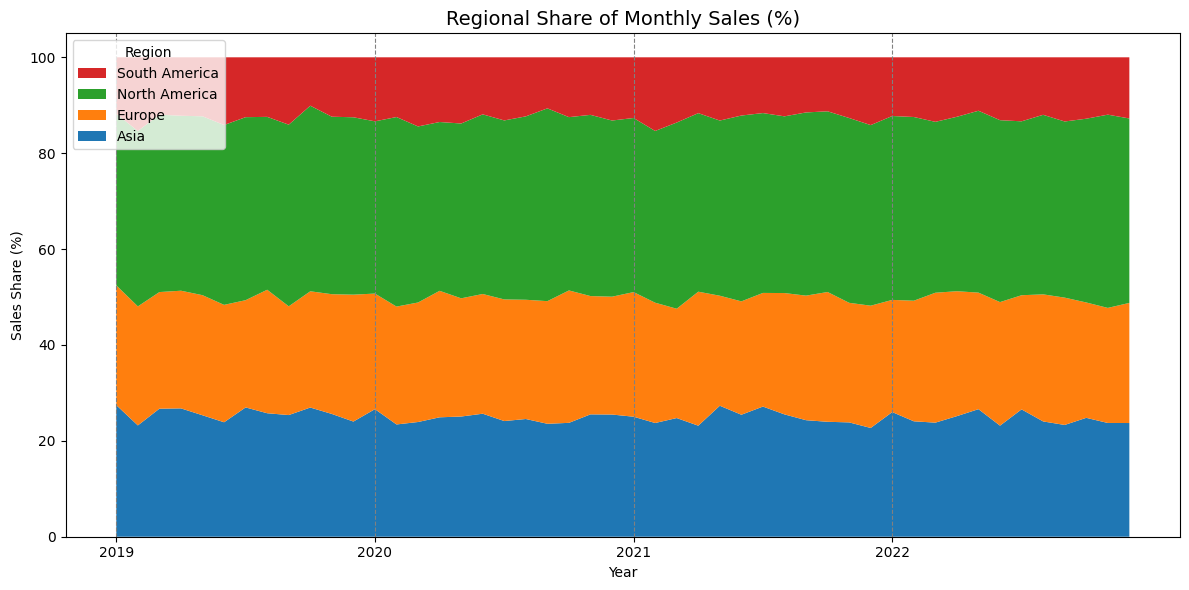

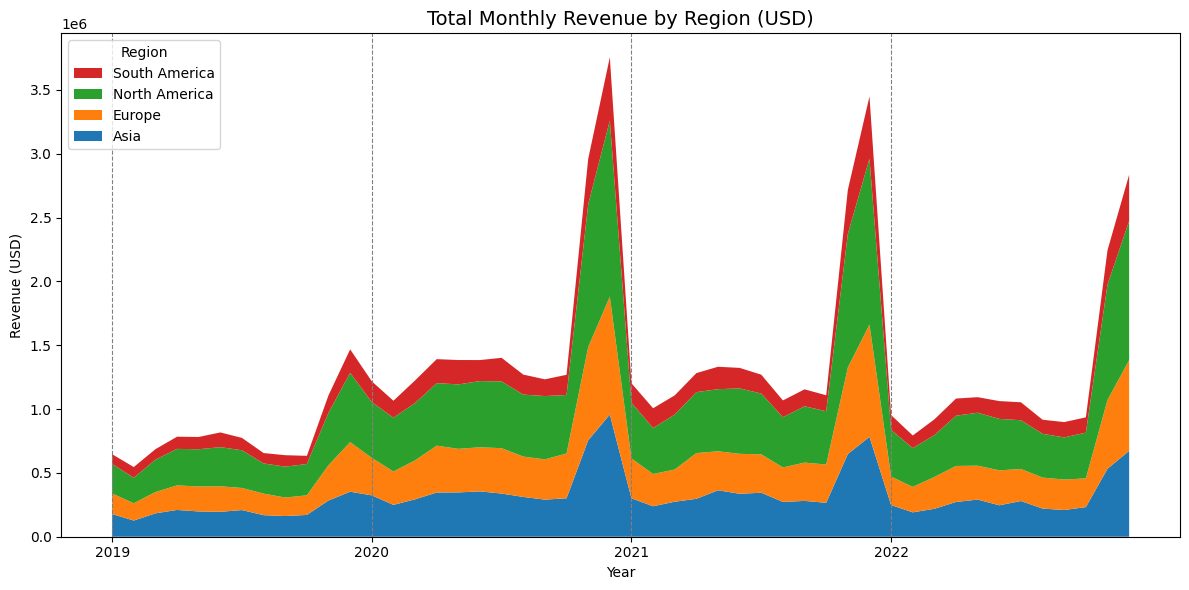

In [ ]:
# Monthly-region revenue table
df['purchase_month'] = df['purchase_ts'].dt.to_period('M')
monthly_region_revenue = df.groupby(['purchase_month', 'region'])['usd_price'].sum().unstack(fill_value=0)

# Normalize to get % share per region each month
monthly_region_percent = monthly_region_revenue.div(monthly_region_revenue.sum(axis=1), axis=0) * 100

# Plotting function
def plot_stacked_area_chart(df_data, title, ylabel):
    plt.figure(figsize=(12, 6))

    plt.stackplot(df_data.index.astype(str), df_data.T.values, labels=df_data.columns)

    # Year
    years = sorted(df_data.index.year.unique())
    for yr in years:
        plt.axvline(x=f'{yr}-01', linestyle='--', color='gray', linewidth=0.8)

    # Legend order
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], loc='upper left', title='Region')

    # Labels and titles
    plt.title(title, fontsize=14)
    plt.xlabel("Year")
    plt.ylabel(ylabel)

    # Yearly x-axis ticks only
    plt.xticks([f"{yr}-01" for yr in years], [str(yr) for yr in years])

    plt.tight_layout()
    plt.grid(visible=False)
    plt.show()

# Plot % contribution of regions
plot_stacked_area_chart(
    monthly_region_percent,
    title="Regional Share of Monthly Sales (%)",
    ylabel="Sales Share (%)"
)

# Plot total monthly revenue by region
plot_stacked_area_chart(
    monthly_region_revenue,
    title="Total Monthly Revenue by Region (USD)",
    ylabel="Revenue (USD)"
)

### Loyalty Program

Evalute the loyalty program of MapleTech on key metrics such as revenue, number of orders, avg. order value (AOV), and refund rates. This will help inspect the impact of loyalty program in driving customer engagement and repeat purchases.

In [ ]:
# Extracting purchase year
df['purchase_year'] = df['purchase_ts'].dt.to_period('Y')

# Group by loyalty tier and year, and summarize
loyalty_yearly_summary = df.groupby(['loyalty_program', 'purchase_year']).agg(
    revenue_usd=('usd_price', 'sum'),
    order_count=('order_id', 'nunique'),
    average_order_value_usd=('usd_price', 'mean')
)

# Growth calculations per loyalty tier
loyalty_yearly_summary['revenue_growth_%'] = loyalty_yearly_summary.groupby('loyalty_program')['revenue_usd'].pct_change() * 100
loyalty_yearly_summary['order_growth_%'] = loyalty_yearly_summary.groupby('loyalty_program')['order_count'].pct_change() * 100
loyalty_yearly_summary['aov_growth_%'] = loyalty_yearly_summary.groupby('loyalty_program')['average_order_value_usd'].pct_change() * 100

# Cleaning and Filling NA values
loyalty_yearly_summary = loyalty_yearly_summary.fillna(0)
loyalty_yearly_summary[['revenue_usd', 'average_order_value_usd']] = loyalty_yearly_summary[
    ['revenue_usd', 'average_order_value_usd']
].round(2)
loyalty_yearly_summary[['order_count']] = loyalty_yearly_summary[['order_count']].astype(int)
loyalty_yearly_summary[['revenue_growth_%', 'order_growth_%', 'aov_growth_%']] = loyalty_yearly_summary[
    ['revenue_growth_%', 'order_growth_%', 'aov_growth_%']
].round(1)


# Background gradient for customization
styled_loyalty_yearly_summary = loyalty_yearly_summary.style.format({
    'revenue_usd': '${:,.0f}',
    'average_order_value_usd': '${:,.2f}',
    'revenue_growth_%': '{:+.1f}%',
    'order_growth_%': '{:+.1f}%',
    'aov_growth_%': '{:+.1f}%'
}).background_gradient(
    subset=['revenue_growth_%', 'order_growth_%', 'aov_growth_%'],
    cmap='PuBuGn',
    vmin=-100,
    vmax=100
)

styled_loyalty_yearly_summary

Loyalty Program Impact on Metrics

/tmp/ipython-input-32-2766432159.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels([f'{int(y/1000)}K' for y in yticks])


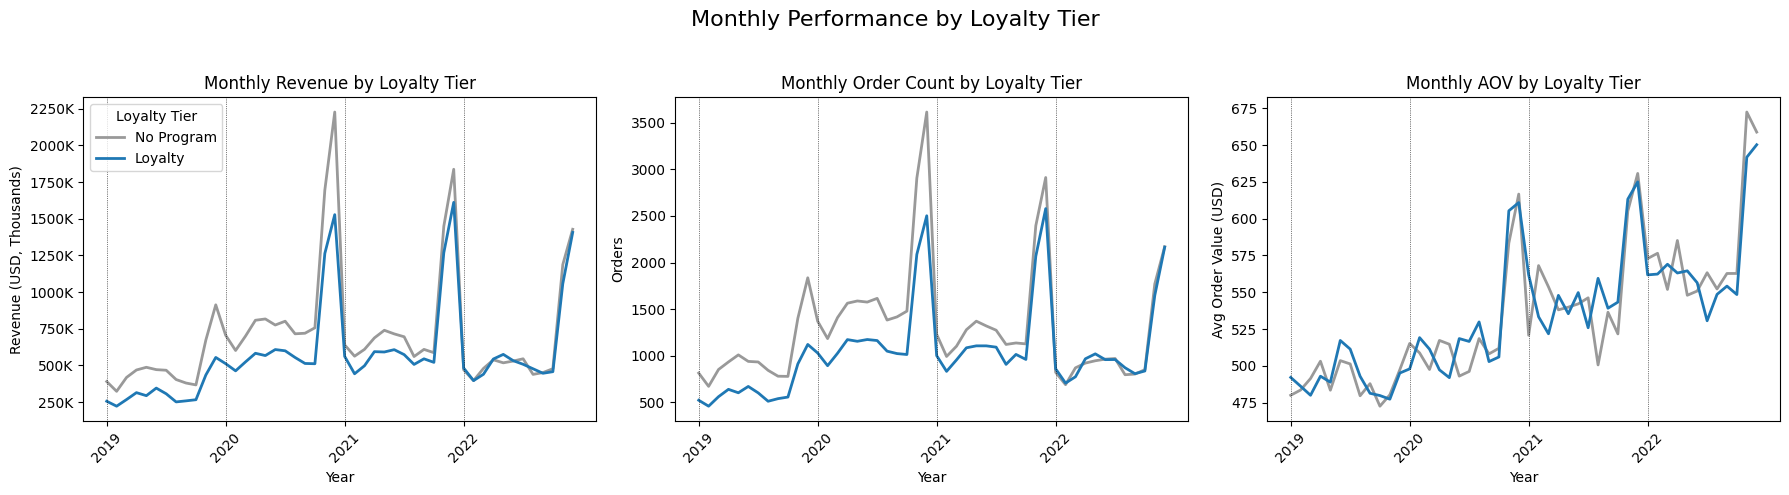

In [ ]:
# Extract purchase month
df['purchase_month'] = df['purchase_ts'].dt.to_period('M')

# Monthly aggregation by loyalty program
monthly_loyalty = df.groupby(['loyalty_program', 'purchase_month']).agg(
    monthly_revenue_usd=('usd_price', 'sum'),
    monthly_orders=('order_id', 'nunique'),
    monthly_avg_order_value_usd=('usd_price', 'mean')
).reset_index()

# Setup for plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Color settings for loyalty vs non-loyalty
programs = monthly_loyalty['loyalty_program'].unique()
colors = {0: '#999999', 1: '#1f78b4'}  # 0=None, 1=Silver, 2=Gold, 3=Platinum

# Metrics to plot
metrics = [
    ('monthly_revenue_usd', 'Monthly Revenue by Loyalty Tier', 'Revenue (USD, Thousands)'),
    ('monthly_orders', 'Monthly Order Count by Loyalty Tier', 'Orders'),
    ('monthly_avg_order_value_usd', 'Monthly AOV by Loyalty Tier', 'Avg Order Value (USD)')
]

# Loop through and plot each metric
for i, (metric, title, y_label) in enumerate(metrics):
    for program in programs:
        group_data = monthly_loyalty[monthly_loyalty['loyalty_program'] == program]
        label = {0: 'No Program', 1: 'Loyalty'}.get(program, f'Program {program}')
        axes[i].plot(group_data['purchase_month'].astype(str), group_data[metric],
                     label=label, color=colors.get(program, 'gray'), linewidth=2)


    axes[i].set_title(title)
    axes[i].set_ylabel(y_label)
    axes[i].set_xlabel('Year')
    axes[i].tick_params(axis='x', rotation=45)

    # Year markers
    years = sorted(group_data['purchase_month'].dt.year.unique())
    axes[i].set_xticks([f"{y}-01" for y in years])
    axes[i].set_xticklabels([str(y) for y in years])
    for y in years:
        axes[i].axvline(x=f"{y}-01", color='black', linestyle=':', linewidth=0.5)

    # Convert y-axis to K for revenue
    if metric == 'monthly_revenue_usd':
        yticks = axes[i].get_yticks()
        axes[i].set_yticklabels([f'{int(y/1000)}K' for y in yticks])

    if i == 0:
        axes[i].legend(title='Loyalty Tier', loc='upper left')

# Title and layout
plt.suptitle("Monthly Performance by Loyalty Tier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Loyalty Program Impact on Order Volume

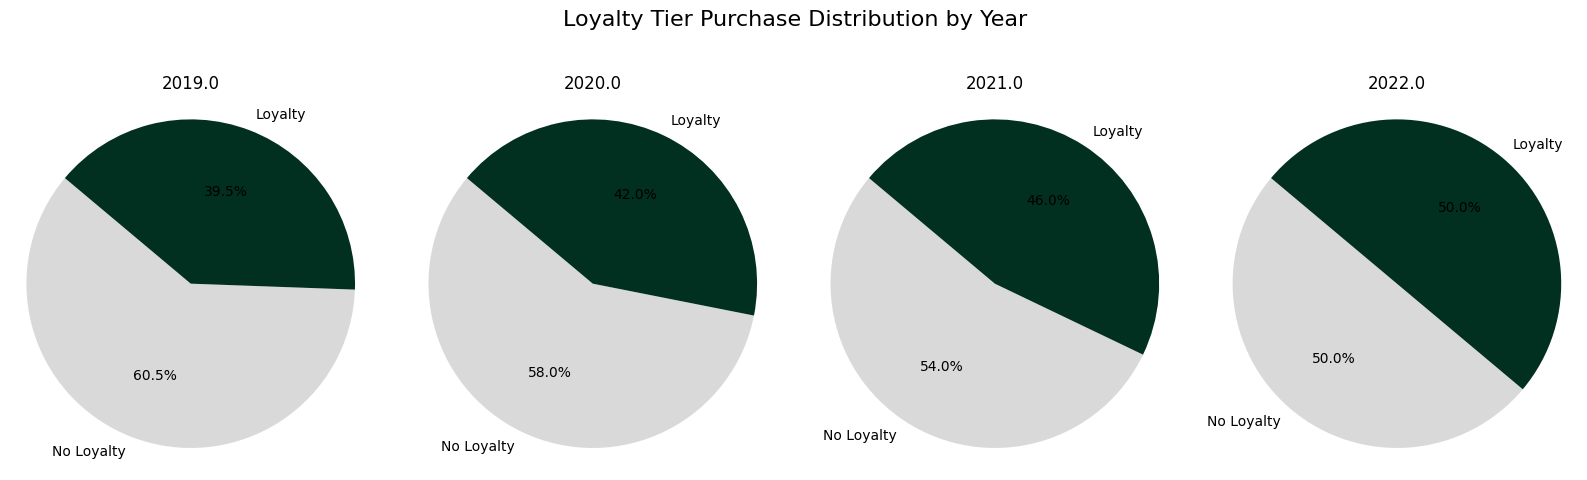

In [ ]:
# Extract year from purchase date
df['purchase_year'] = df['purchase_ts'].dt.year

# Number of orders per loyalty tier per year
loyalty_pie_data = df.groupby(['purchase_year', 'loyalty_program'])['order_id'].count().unstack(fill_value=0)

# Coloring and labelling. maps
tier_labels = {0: 'No Loyalty', 1: 'Loyalty', 2:'E-commerce'}
colors = {
    0: '#d9d9d9',  # grey
    1: '#023020',  # silver-light blue
}


# Matching the  color and label order based on columns
tier_order = loyalty_pie_data.columns.tolist()
pie_colors = [colors.get(tier, 'gray') for tier in tier_order]
pie_labels = [tier_labels.get(tier, f'Tier {tier}') for tier in tier_order]

# Creating subplots for each year
num_years = loyalty_pie_data.shape[0]
fig, axes = plt.subplots(1, num_years, figsize=(4 * num_years, 5))

# Pie Plot
for i, (year, data) in enumerate(loyalty_pie_data.iterrows()):
    ax = axes[i] if num_years > 1 else axes
    ax.pie(data, labels=pie_labels, autopct='%1.1f%%', startangle=140, colors=pie_colors)
    ax.set_title(str(year))
    ax.axis('equal')


# Title and layout
fig.suptitle("Loyalty Tier Purchase Distribution by Year", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Loyalty Program Impact on Refund Metrics

In [ ]:
# Extracting purchase year
df['purchase_year'] = df['purchase_ts'].dt.to_period('Y')

# Group by loyalty and year
refund_yearly_summary = df.groupby(['loyalty_program', 'purchase_year']).agg(
    total_orders=('order_id', 'nunique'),
    total_refunds=('order_id', lambda x: x[df.loc[x.index, 'is_refunded']].nunique()),
    refund_rate_percent=('is_refunded', lambda x: round(x.mean() * 100, 2))
)


# Growth calculation
refund_yearly_summary['order_growth_%'] = (
    refund_yearly_summary.groupby('loyalty_program')['total_orders'].pct_change() * 100
)


# Formating
refund_yearly_summary = refund_yearly_summary.fillna(0)
refund_yearly_summary[['total_orders', 'total_refunds']] = refund_yearly_summary[
    ['total_orders', 'total_refunds']
].astype(int)
refund_yearly_summary[['order_growth_%']] = refund_yearly_summary[['order_growth_%']].round(1)


# Background gradient for customization
styled_refund_summary = refund_yearly_summary.style.format({
    'refund_rate_percent': '{:.1f}%',
    'order_growth_%': '{:+.1f}%'
}).background_gradient(
    subset=['order_growth_%'],
    cmap='RdYlGn',
    vmin=-100,
    vmax=100
)


styled_refund_summary

## Product Perdormance

Now we will asses the performance of each product focusing on key metrics like total revenue, average order value (AOV), order count, and refund rates. This will help us identify top performing products and show areas of improvement for product strategy

In [ ]:
# Aggregate product performance metrics
product_performance = df.groupby('product_name').agg(
    total_revenue_usd=('usd_price', 'sum'),
    revenue_share_percent=('usd_price', lambda x: x.sum() / df['usd_price'].sum() * 100),
    avg_order_value_usd=('usd_price', 'mean'),
    total_orders=('order_id', 'count'),
    order_share_percent=('order_id', lambda x: x.count() / df['order_id'].count() * 100),
    refund_rate_percent=('is_refunded', lambda x: x.mean() * 100),
    total_refunds=('is_refunded', 'sum')
)


# Sort by total revenue
product_performance = product_performance.sort_values(by='total_revenue_usd', ascending=False)

# Round numeric columns to 2 decimal places
product_performance = product_performance.round(2)

# Background gradient for customization
styled_product_performance = product_performance.style.format({
    'total_revenue_usd': '${:,.2f}',
    'revenue_share_percent': '{:.2f}%',
    'avg_order_value_usd': '${:,.2f}',
    'order_share_percent': '{:.2f}%',
    'refund_rate_percent': '{:.2f}%',
    'total_refunds': '{:,}',
    'total_orders': '{:,}'
}).background_gradient(
    subset=['revenue_share_percent', 'order_share_percent', 'avg_order_value_usd'],
    cmap="Greens",
    vmin=0
).background_gradient(
    subset=['refund_rate_percent'],
    cmap="Reds",
    vmin=0
)


styled_product_performance

,total_revenue_usd,revenue_share_percent,avg_order_value_usd,total_orders,order_share_percent,refund_rate_percent,total_refunds
product_name,,,,,,,
JBL Live Pro+ Earbuds,"$19,039,225.97",30.76%,"$1,120.88","16,997",15.05%,19.79%,"3,363"
Anker USB-C Charger,"$14,488,077.13",23.40%,"$1,283.83","11,286",9.99%,19.39%,"2,188"
ASUS ProArt Display,"$11,131,750.68",17.98%,"$1,008.04","11,044",9.78%,6.97%,770
Macbook Air Laptop,"$11,103,275.13",17.94%,$391.15,"28,398",25.15%,6.46%,"1,835"
Dell XPS 13 Laptop,"$3,995,496.73",6.45%,$178.46,"22,396",19.83%,8.01%,"1,795"
Apple iPhone,"$1,279,419.52",2.07%,$223.40,"5,730",5.07%,4.64%,266
LG UltraFine 5K Monitor,"$490,893.66",0.79%,$88.67,"5,539",4.90%,5.02%,278
Sony WH-1000XM5 Headphones,"$376,039.50",0.61%,$32.59,"11,540",10.22%,3.47%,400
